In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
mpl.rcParams['savefig.dpi'] = 128
mpl.rcParams['figure.dpi'] = 128
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (14, 7))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
mpl.rc('axes', grid = False)
# Set backgound color to white
mpl.rc('axes', facecolor = 'white')

In [2]:
df = pd.read_csv("2014-2017.csv")
df.shape

(159209, 9)

In [3]:
from sklearn.utils import resample

df_majority = df[df['enquiry status'] == 'Rejected']
df_minority = df[df['enquiry status'] == 'Accepted']


# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=25277,    # to match majority class
                                 random_state=123) # reproducible results



# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled['enquiry status'].value_counts()

Accepted    25277
Rejected    25277
Name: enquiry status, dtype: int64

In [4]:
# # Separate majority and minority classes
# df_majority = df[df['enquiry status'] == 'Rejected']
# df_minority = df[df['enquiry status'] == 'Accepted']
 
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=218370,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_upsampled['enquiry status'].value_counts()

In [5]:
df = df_downsampled

In [6]:
target = 'enquiry status';

X = df[df.keys()]
X = df.loc[:,df.columns != target]
y = df[target]

In [7]:
category_column = X.select_dtypes(include='object')

In [8]:
# X = pd.get_dummies(X)

In [9]:
from sklearn import preprocessing

transform_dict = {}
for col in category_column.columns:
    le = preprocessing.LabelEncoder()
    X[col] = le.fit_transform(X[col])
    transform_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [10]:
from sklearn.preprocessing import StandardScaler

feat_labels = X.columns[0:]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import linear_model
# from sklearn.ensemble import RandomForestClassifier

# # Create logistic regression
# randomForest = RandomForestClassifier()

# # Create range of candidate penalty hyperparameter values
# n_estimators = [100, 500, 1000]
# max_features = [3, 5, 8]

# # Create dictionary hyperparameter candidates
# hyperparameters = dict(n_estimators=n_estimators, max_features=max_features)

# # Create grid search
# gridsearch = GridSearchCV(randomForest, hyperparameters, cv=5, verbose=0 , n_jobs=-1)

# # Fit grid search
# best_model = gridsearch.fit(X, y)

In [12]:
# # View best hyperparameters
# print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
# print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])

In [13]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size=0.2,
                     random_state=0,
                     stratify=y)

In [14]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=500, n_jobs=-1)
randomForest.fit(X_train, y_train)
rf_label = randomForest.predict(X_test)
print('Test Accuracy: %.3f' % randomForest.score(X_test, y_test))

Test Accuracy: 0.760


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import cross_validation

scores = cross_validation.cross_val_score(randomForest, X_train, y_train, cv=3)
print("Random forest cross_validation: {:.2f}".format(np.mean(scores, axis=0)))

print("Random forest")
print(classification_report(y_test, rf_label))

/Users/mluo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Random forest cross_validation: 0.75
Random forest
             precision    recall  f1-score   support

          0       0.73      0.83      0.78      5056
          1       0.80      0.69      0.74      5055

avg / total       0.77      0.76      0.76     10111



In [ ]:
prob_y_2 = randomForest.predict_proba(X)
prob_y_2 = [p[1] for p in prob_y_2]
print( roc_auc_score(y, prob_y_2) )

0.991408298869


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=randomForest,
                                                        X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,n_jobs=-1,verbose=4)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores, axis=1)      
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



[learning_curve] Training set sizes: [ 3639  7279 10919 14558 18198 21838 25477 29117 32757 36397]
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.7068709836875927, total=   4.2s
[CV]  ................................................................
[CV] ....................... , score=0.7286208601087494, total=   6.4s
[CV]  ................................................................
[CV] ....................... , score=0.7355412753

[Parallel(n_jobs=-1)]: Done  23 out of 100 | elapsed:  1.2min remaining:  3.9min


[CV]  ................................................................
[CV] ....................... , score=0.7378832838773491, total=  20.6s
[CV]  ................................................................
[CV] ....................... , score=0.7495673671199011, total=  36.2s
[CV]  ................................................................
[CV] ....................... , score=0.7116716122650841, total=  11.3s
[CV]  ................................................................
[CV] ....................... , score=0.7403560830860534, total=  24.7s
[CV]  ................................................................
[CV] ....................... , score=0.7487636003956478, total=  27.3s
[CV]  ................................................................
[CV] ....................... , score=0.7260138476755688, total=  12.1s
[CV]  ................................................................
[CV] ....................... , score=0.7507418397626113, total=  29.5s
[CV]  

[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:  4.2min remaining:  1.4min


[CV]  ................................................................
[CV] ....................... , score=0.7542037586547973, total=  28.0s
[CV]  ................................................................
[CV] ....................... , score=0.7072205736894164, total=  11.3s
[CV]  ................................................................
[CV] ....................... , score=0.7561819980217607, total=  31.2s
[CV]  ................................................................
[CV] ....................... , score=0.7205736894164194, total=  13.3s
[CV]  ................................................................
[CV] ....................... , score=0.7240356083086054, total=  16.3s
[CV]  ................................................................
[CV] ....................... , score=0.7603857566765578, total=  30.9s
[CV]  ................................................................
[CV] ....................... , score=0.7289812067260139, total=  19.8s
[CV]  

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.7min finished


train_mean [ 0.99994504  0.99975271  0.99983515  0.99987636  0.99985713  0.99982599
  0.99975272  0.99969777  0.99967946  0.99959337]
train_std [  1.64880462e-04   8.24289051e-05   5.49500870e-05   4.12144525e-05
   4.39608748e-05   4.48665582e-05   5.83509391e-05   4.80818766e-05
   4.96957004e-05   4.88402584e-05]
train_mean [ 0.99994504  0.99975271  0.99983515  0.99987636  0.99985713  0.99982599
  0.99975272  0.99969777  0.99967946  0.99959337]
test_std [ 0.00594182  0.0062424   0.00847813  0.00632889  0.00626115  0.0070514
  0.00626507  0.00667891  0.00989599  0.00709079]


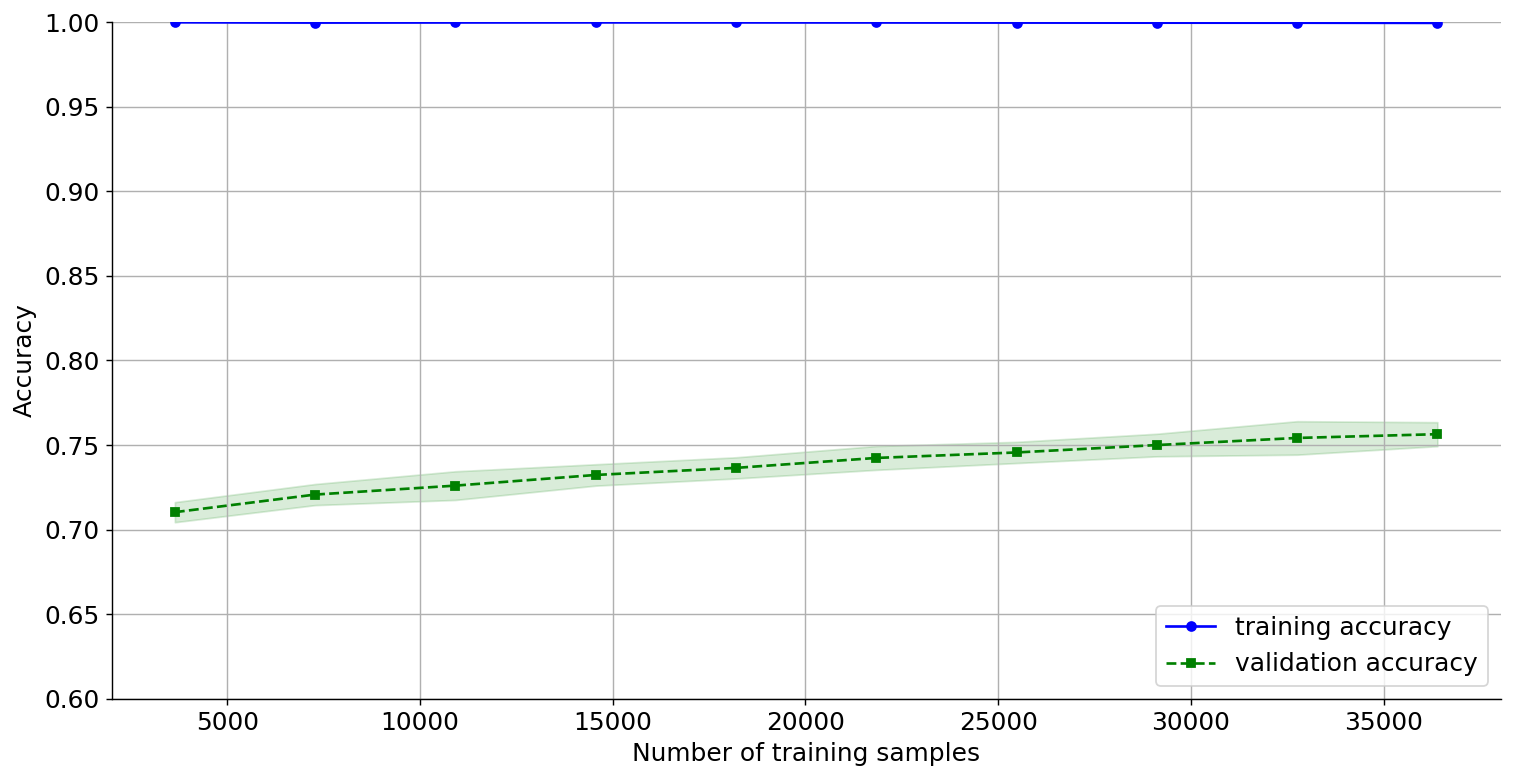

In [ ]:
print("train_mean",train_mean)
print("train_std",train_std)
print("train_mean",train_mean)
print("test_std",test_std)


plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')               
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.show()

In [ ]:
# # feat_labels = X.columns[0:]
# importances = randomForest.feature_importances_

# # reverse the list
# indices = np.argsort(importances)[::-1]

# for f in range(X_train.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(randomForest, X_train, y_train, cv=3,
                            n_jobs=-1)
fpr, tpr, thresholds = roc_curve(X_train, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [ ]:
from sklearn.externals import joblib
encoder = joblib.load('app/models/encoder.pkl')

In [ ]:
import json
my_json_string = json.dumps({
#     'marketing_code':'P0001',
    "classification": "Direct",
    "enquired":"29/1/15 12:10",
    "loan amount": "1184000",
    "property_use": "Residence",
    "loan_reason": "Refinance"
})

In [ ]:
data = json.loads(my_json_string)
data = pd.DataFrame(data,index=[0])

In [ ]:
def transform_cols(df):
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace('_', ' ')
    return df

In [ ]:
transform_cols(data)

In [ ]:
data.dtypes

In [ ]:
def transform(df): 
    if 'loan amount' in df.columns: 
        df['loan amount'] = df['loan amount'].astype('float')
        
    if 'enquired' in df.columns: 
        df['enquired'] = pd.DatetimeIndex(df['enquired'])
        df['month'] = df['enquired'].dt.month
        df['day'] = df['enquired'].dt.day
        df['hour'] = df['enquired'].dt.hour
        df['weekday'] = df['enquired'].dt.dayofweek
    
    if 'post code' in df.columns: 
        df['post code'] = df['post code'].astype('int')
    
    if 'enquired'in df.columns:
        df.drop(['enquired'], axis = 1, inplace = True)

    return df.replace(encoder)

In [ ]:
data = transform(data)
data.dtypes

In [ ]:
# data = pd.get_dummies(data)

In [ ]:
randomForest.predict(data)

In [ ]:
print("posibility is: {}".format(np.max(randomForest.predict_proba(data))))

In [ ]:
df = pd.read_csv("2007-2017_origin.csv")

In [ ]:
df['classification'].value_counts()

In [ ]:
test = df[df['enquiry status'] == 'Accepted']
# test = test[test['classification'] == 'Domain']
test = test.loc[:,test.columns != 'enquiry status']

In [ ]:
test = transform(test)

In [ ]:
# test

In [ ]:
prediction = randomForest.predict(test)

In [ ]:
proba = []
result = randomForest.predict_proba(test)
for row in range(len(result)):
    proba.append(np.max(result[row]))

In [ ]:
test["prediction"] = prediction
test["proba"] = proba

In [ ]:
test.sort_values(by=['proba'],ascending=False)

In [ ]:
test[test['proba'] < 0.56].count()

In [ ]:
test[test["prediction"] == 1].count()

In [ ]:
test[test["prediction"] == 0].count()

In [ ]:
X_train.shape